In [1]:
import grequests
import src.Engines.gdc_engine as gdc_engine
import src.MLPreprocessor.RNASeqPreprocessor as rna_pp
import src.Connectors.gcp_bigquery_utils as gcp_bigquery_utils

## 0. Process the data


In [2]:
project_id = 'rnaseqml'
dataset_id = 'rnaseqexpression'
table_id = 'expr_clustered_08082024'
bq_queries = gcp_bigquery_utils.BigQueryQueries(project_id=project_id, 
                                              dataset_id=dataset_id,
                                              table_id=table_id)
pr_site = 'Head and Neck'
pr_diag = 'Squamous cell carcinoma, NOS'
data_from_bq = bq_queries.get_df_for_pydeseq(primary_site=pr_site, primary_diagnosis=pr_diag)

I0000 00:00:1725950047.917240 3576609 config.cc:230] gRPC experiments enabled: call_status_override_on_cancellation, event_engine_dns, event_engine_listener, http2_stats_fix, monitoring_experiment, pick_first_new, trace_record_callops, work_serializer_clears_time_cache
I0000 00:00:1725950047.930252 3576609 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported
I0000 00:00:1725950057.686395 3576609 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [3]:
params = {
    'files.experimental_strategy': 'RNA-Seq', 
    'data_type': 'Gene Expression Quantification'
}
site = 'Head and Neck'
gdc_eng_inst = gdc_engine.GDCEngine(**params)
json_object, gene_cols = gdc_eng_inst.make_count_data_for_bq(site, downstream_analysis='DE', format='json')

dict_keys(['files.experimental_strategy', 'data_type'])
file_id,file_name,submitter_id,experimental_strategy,data_type,platform,cases.case_id,cases.project.name,cases.project.project_id,cases.project.program.name,cases.project.program.program_id,cases.samples.sample_id,cases.diagnoses.last_known_disease_status,cases.diagnoses.primary_diagnosis,cases.diagnoses.tumor_stage,cases.diagnoses.tumor_grade,cases.diagnoses.treatments.treatment_or_therapy,cases.diagnoses.days_to_last_follow_up,cases.diagnoses.age_at_diagnosis,cases.diagnoses.days_to_death,cases.project.primary_site,analysis.workflow_type,cases.demographic.ethnicity,cases.demographic.gender,cases.demographic.race,cases.diagnoses.tissue_or_organ_of_origin,cases.exposures.bmi,cases.exposures.alcohol_history,cases.exposures.years_smoked,cases.samples.tissue_type,cases.samples.sample_typecases.samples.is_ffpe,cases.samples.preservation_method,cases.diagnoses.tumor_stage,cases.diagnoses.tumor_grade,cases.diagnoses.age_at_diagnosis,cas

100%|██████████| 11/11 [07:56<00:00, 43.31s/it]


In [4]:
preprocessor = rna_pp.RNASeqPP(data_from_bq, gene_cols)
X_train, X_test, X_val, y_train, y_test, y_val = preprocessor.prepare_data()


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9066 - val_loss: 0.6541 - learning_rate: 0.0010
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step - loss: 0.9063 - val_loss: 0.6586 - learning_rate: 0.0010
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 0.8966 - val_loss: 0.6641 - learning_rate: 0.0010
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.8359 - val_loss: 0.6628 - learning_rate: 0.0010
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 0.7991 - val_loss: 0.6648 - learning_rate: 0.0010
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - loss: 0.8275 - val_loss: 0.6614 - learning_rate: 0.0010
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 0.7970 - val_loss: 0.6617 - learning_rate: 2.0000e-04
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - loss: 0.7929 - val_loss: 0.6620 - learning_rate: 2.0000e-04
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.7812 - val_loss: 0.6624 - learning_rate: 2.0000e-04
Epoch 10/2

In [52]:
X_train

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,7.170120,0.0,6.980076,5.802118,5.886104,5.616771,8.047829,7.640123,6.963190,6.896694,...,0.0,0.000000,2.397895,0.0,0.0,0.000000,5.236442,0.0,0.000000,3.806662
1,7.275172,0.0,7.768956,5.620401,5.509388,4.934474,7.427144,7.225481,8.162516,6.834109,...,0.0,0.000000,1.386294,0.0,0.0,0.693147,4.521789,0.0,0.000000,2.397895
2,7.632401,0.0,7.100852,6.317165,6.030685,6.573680,7.753194,7.330405,9.931686,7.315884,...,0.0,0.693147,3.178054,0.0,0.0,0.000000,4.605170,0.0,1.386294,2.833213
3,6.664409,0.0,7.760041,5.789960,5.793014,5.068904,7.215240,7.369601,6.677083,7.076654,...,0.0,0.693147,3.555348,0.0,0.0,0.000000,4.709530,0.0,1.098612,1.945910
4,8.193400,0.0,7.952615,5.730100,5.866468,4.912655,6.401917,7.638680,9.626350,7.077498,...,0.0,0.000000,0.693147,0.0,0.0,0.000000,5.323010,0.0,1.098612,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,7.630947,0.0,7.710653,6.429719,6.418365,6.182085,8.167636,7.533694,8.458504,7.559559,...,0.0,0.000000,2.890372,0.0,0.0,0.000000,5.327876,0.0,1.098612,3.044522
490,7.626083,0.0,7.719574,6.423247,6.391917,6.182085,8.170469,7.530480,8.456381,7.560601,...,0.0,0.000000,2.890372,0.0,0.0,0.000000,5.327876,0.0,1.098612,3.044522
491,7.617268,0.0,7.726654,6.416732,6.400257,6.171701,8.171034,7.530480,8.460834,7.563201,...,0.0,0.000000,2.890372,0.0,0.0,0.000000,5.332719,0.0,1.098612,3.044522
492,7.624131,0.0,7.714231,6.424869,6.405228,6.173786,8.165932,7.531552,8.457018,7.558517,...,0.0,0.000000,2.890372,0.0,0.0,0.000000,5.337538,0.0,1.098612,3.044522


##  Classification Experiments


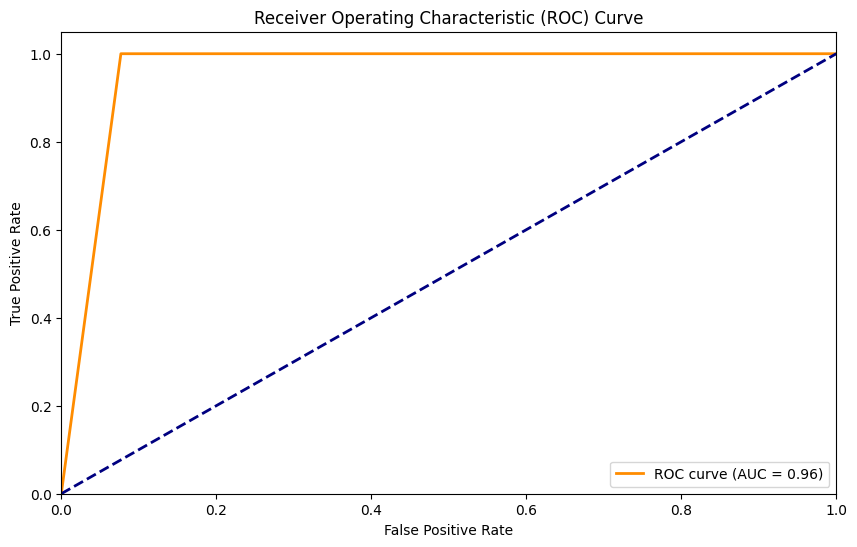

Accuracy: 0.9615


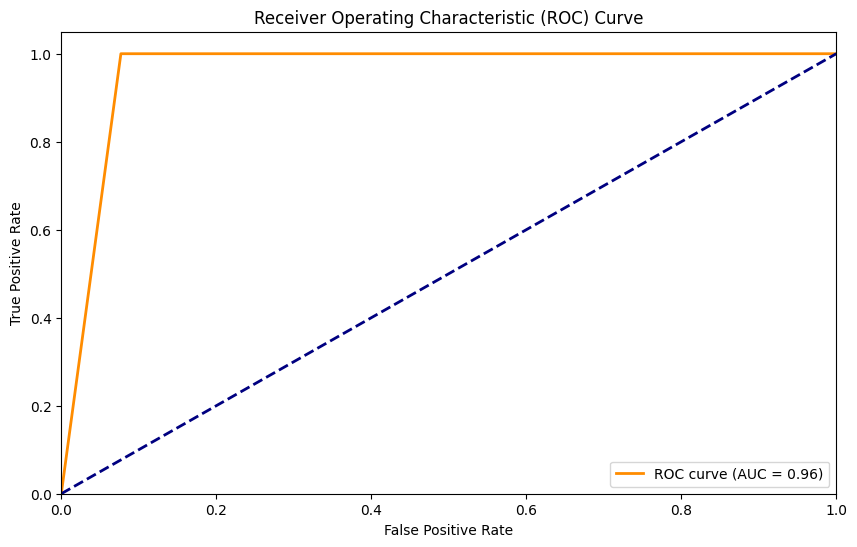

Accuracy: 0.9615


/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



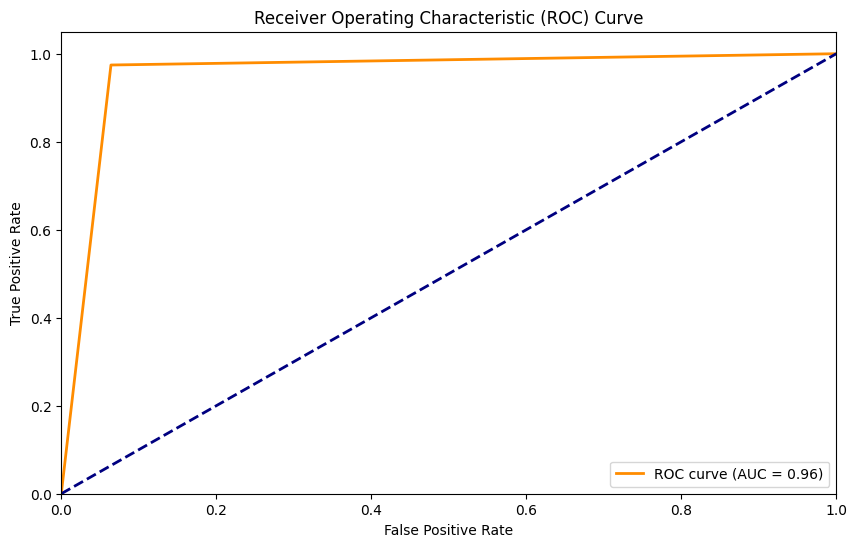

Accuracy: 0.9551


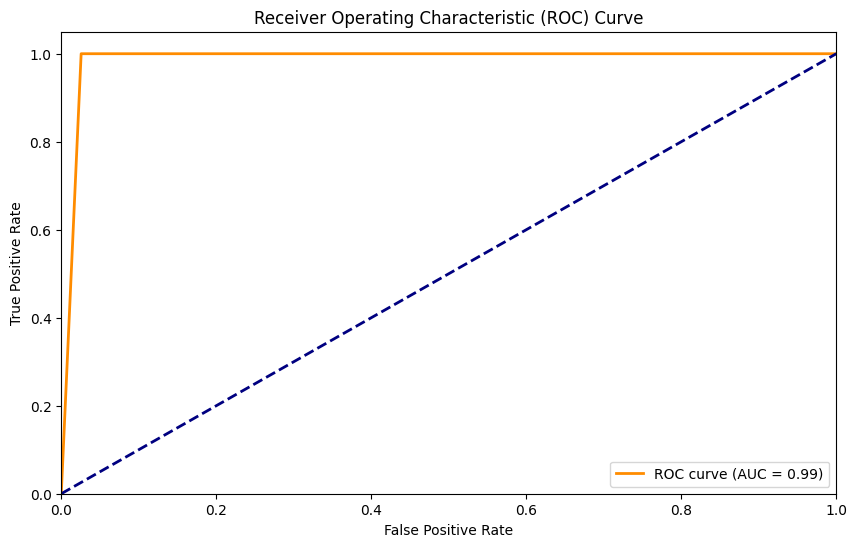

Accuracy: 0.9872


In [106]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# from src.ClassicML.Supervised.base_models import SVMModel, RandomForestModel, NeuralNetworkModel, EnsembleModel
import src.ClassicML.Supervised.base_models as base_models
import src.ClassicML.DimRedMappers.feature_explainer as fe
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from importlib import reload
reload(base_models)
reload(fe)


# Run non-ensemble models
svm_model, y_pred_svm, accuracy_svm = base_models.SVMModel(n_components=10).run_model(X_train, X_test, y_train, y_test, reduce_dim=True, method='PCA')
rf_model, y_pred_rf, accuracy_rf  = base_models.RandomForestModel(n_components=5).run_model(X_train, X_test, y_train, y_test, reduce_dim=True, method='PCA')
nn_model, y_pred_nn, accuracy_nn  = base_models.NeuralNetworkModel(n_components=5).run_model(X_train, X_test, y_train, y_test, reduce_dim=True, method='PCA')

# Run ensemble model
base_estimators = [
    SVC(probability=True, random_state=42),
    RandomForestClassifier(random_state=42),
    MLPClassifier(random_state=42)
]
ensemble_model = base_models.EnsembleModel(base_estimators=base_estimators)
ensemble_model_run, y_pred_ensemble, accuracy_ensemble = ensemble_model.run_model(X_train, X_test, y_train, y_test, reduce_dim=True, method='PCA')


## Running the LRA 

In [107]:


# Usage example
lra = fe.LRA(model=svm_model)

# Run LRA for a single method
method = 'PCA'
shap_results = lra.run_single_method(X_train, y_train, X_test, y_test, method)



/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but PCA was fitted without feature names



  0%|          | 0/156 [00:00<?, ?it/s]

                  feature    lra_metric  abs_lra_metric
30595   ENSG00000232150.3 -1.829397e-10    1.829397e-10
7104   ENSG00000135537.17 -1.828920e-10    1.828920e-10
15062  ENSG00000181588.16 -1.828210e-10    1.828210e-10
5078    ENSG00000120688.9 -1.827516e-10    1.827516e-10
4117   ENSG00000112855.17 -1.827074e-10    1.827074e-10
5677   ENSG00000125629.15 -1.826550e-10    1.826550e-10
5108   ENSG00000120889.13 -1.826085e-10    1.826085e-10
8895   ENSG00000146872.18 -1.825863e-10    1.825863e-10
4830   ENSG00000118600.12 -1.825686e-10    1.825686e-10
10219  ENSG00000158480.11 -1.825398e-10    1.825398e-10


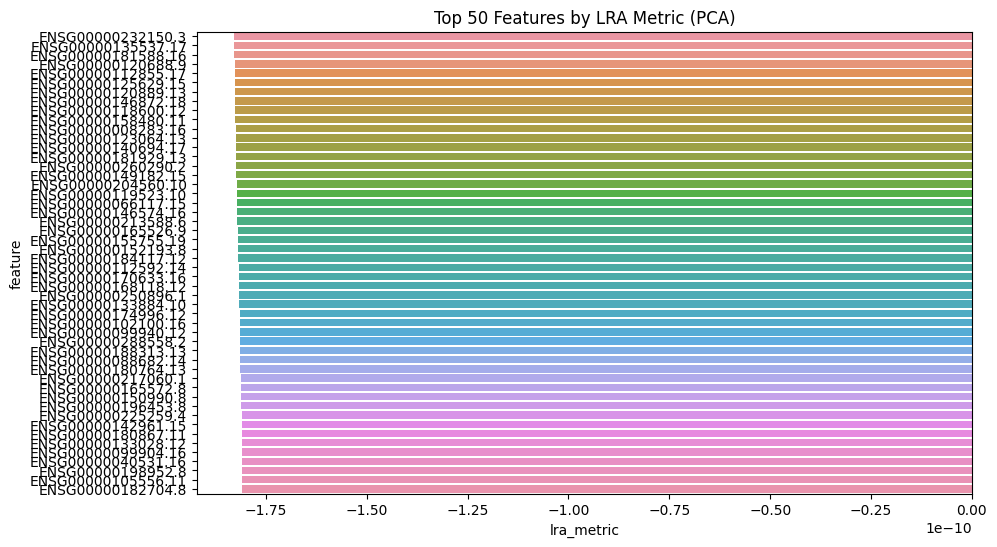

In [108]:
# Load gene name to gene id mapping
gene_name_to_gene_id = pd.read_csv('/Users/abhilashdhal/Projects/personal_docs/data/Transcriptomics/data/gene_annotation/gene_id_to_gene_name_mapping.csv')

# Calculate LRA metric
shap_values = shap_results['PCA']

# Check if dimensionality reduction was applied
if len(shap_values) == X_test.shape[1]:
    # No dimensionality reduction
    feature_names = [gene_cols[i] for i in range(X_test.shape[1])]
else:
    # Dimensionality reduction was applied
    feature_names = [f'PC_{i+1}' for i in range(len(shap_values))]

lra_df = pd.DataFrame({
    'feature': feature_names,
    'lra_metric': shap_values
})

lra_df['abs_lra_metric'] = np.abs(lra_df['lra_metric'])

# Sort the dataframe
lra_df_sorted = lra_df.sort_values('abs_lra_metric', ascending=False)

print(lra_df_sorted.head(10))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='lra_metric', y='feature', data=lra_df_sorted.head(50))
plt.title(f'Top 50 Features by LRA Metric ({method.upper()})')
plt.show()


In [115]:
X_test

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,6.809039,0.000000,7.030857,6.163315,5.746203,4.867534,7.358831,6.715383,8.375399,7.012115,...,0.0,0.0,2.302585,0.0,0.000000,0.000000,5.129899,0.0,0.000000,2.833213
1,7.386471,0.000000,7.774436,6.489205,5.703782,5.549076,7.800163,7.201916,7.253470,7.436028,...,0.0,0.0,3.091042,0.0,0.000000,0.000000,4.990433,0.0,1.098612,3.135494
2,7.760041,0.693147,7.813592,6.291569,6.390241,6.196444,7.918992,7.652071,9.025816,7.429521,...,0.0,0.0,3.218876,0.0,0.693147,0.000000,5.897154,0.0,1.098612,2.944439
3,8.040769,0.000000,7.636270,6.689599,7.011214,5.068904,8.778942,8.315811,7.985484,7.304516,...,0.0,0.0,3.258097,0.0,0.000000,1.609438,5.620401,0.0,1.386294,2.079442
4,7.358194,0.000000,8.111328,6.647688,6.297109,5.648974,7.579168,7.612831,10.313973,8.192847,...,0.0,0.0,2.944439,0.0,0.000000,0.000000,5.860786,0.0,1.098612,2.833213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,8.490028,3.465736,7.412764,6.815640,5.793014,6.089045,8.985570,7.371489,8.099858,7.186144,...,0.0,0.0,1.945910,0.0,0.000000,0.000000,5.303305,0.0,1.609438,2.995732
152,7.630461,0.000000,7.719130,6.418365,6.405228,6.180017,8.171317,7.533694,8.457655,7.559559,...,0.0,0.0,2.833213,0.0,0.000000,0.000000,5.332719,0.0,1.098612,3.044522
153,7.628518,0.000000,7.717796,6.419995,6.408529,6.188264,8.160804,7.526718,8.446985,7.564757,...,0.0,0.0,2.833213,0.0,0.000000,0.000000,5.327876,0.0,1.098612,3.044522
154,7.629976,0.000000,7.715124,6.429719,6.390241,6.175867,8.167919,7.531552,8.450840,7.561642,...,0.0,0.0,2.890372,0.0,0.000000,0.000000,5.318120,0.0,1.098612,3.044522


## Explainatory Analysis


## 2. Using dalex

In [112]:
import dalex as dx
exp = dx.Explainer(svm_model, svm_model._fit_transform(X_test, method='pca'), y_test)

Preparation of a new explainer is initiated

  -> data              : numpy.ndarray converted to pandas.DataFrame. Columns are set as string numbers.
  -> data              : 156 rows 5 cols
  -> target variable   : 156 values
  -> model_class       : src.ClassicML.Supervised.base_models.SVMModel (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x3a2dfae80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0159, mean = 0.752, max = 0.97
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.925, mean = -0.252, max = 0.984
  -> model_info        : package src

A new explainer has been created!


/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names

/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names



In [7]:
exp.model_performance().result

,recall,precision,f1,accuracy,auc
SVMModel,1.0,0.987342,0.993631,0.99359,0.998521


In [113]:
exp.model_parts(loss_function='mae').plot()


/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names

/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names

/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names

/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names

/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names

/opt/homebrew/anaconda3/envs/omixhub/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but SVC was fitted without feature names

/opt/homebrew/an